In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

OUTPUT_DIR = "../Results/Visualisasi"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Global style (konsisten)
sns.set_theme(
    style="whitegrid",
    context="talk",
    font="sans-serif"
)

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

# DEFINISI WARNA SENTIMEN (FIX)
SENTIMENT_ORDER = ["positive", "negative", "neutral"]

SENTIMENT_PALETTE = {
    "positive": "#069494",  # Hijau Toska
    "negative": "#B7410E",  # Merah Bata
    "neutral":  "#FFCE1B"   # Kuning
}


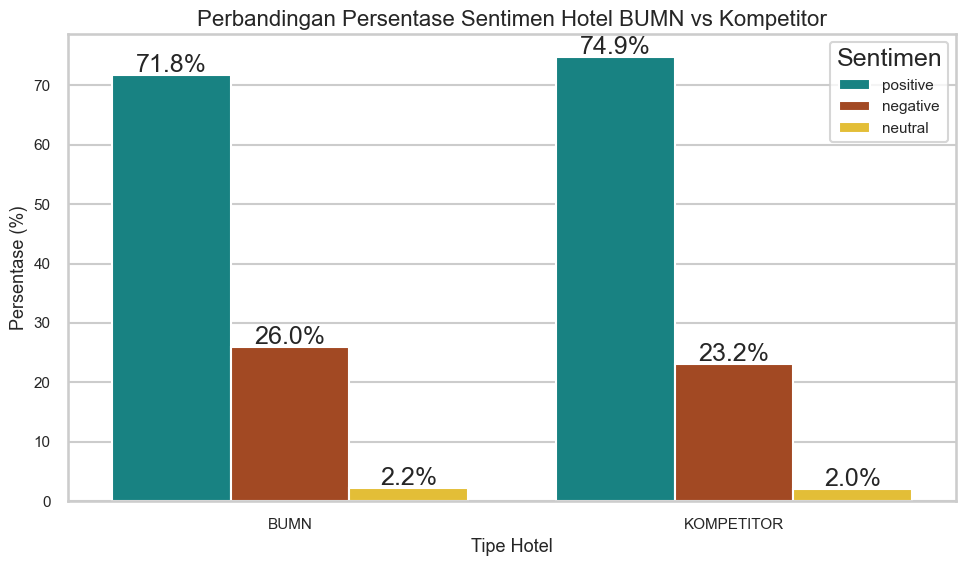

In [20]:
# VISUALISASI 1

plt.figure()

df_plot = (
    df_sentiment_pct
    .groupby(["Tipe", "AI_Sentiment"])["Persentase"]
    .mean()
    .reset_index()
)

ax = sns.barplot(
    data=df_plot,
    x="Tipe",
    y="Persentase",
    hue="AI_Sentiment",
    hue_order=SENTIMENT_ORDER,
    palette=SENTIMENT_PALETTE
)

ax.set_title("Perbandingan Persentase Sentimen Hotel BUMN vs Kompetitor")
ax.set_xlabel("Tipe Hotel")
ax.set_ylabel("Persentase (%)")
ax.legend(title="Sentimen")

add_percentage_labels(ax)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "1_sentimen_bumn_vs_kompetitor.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()


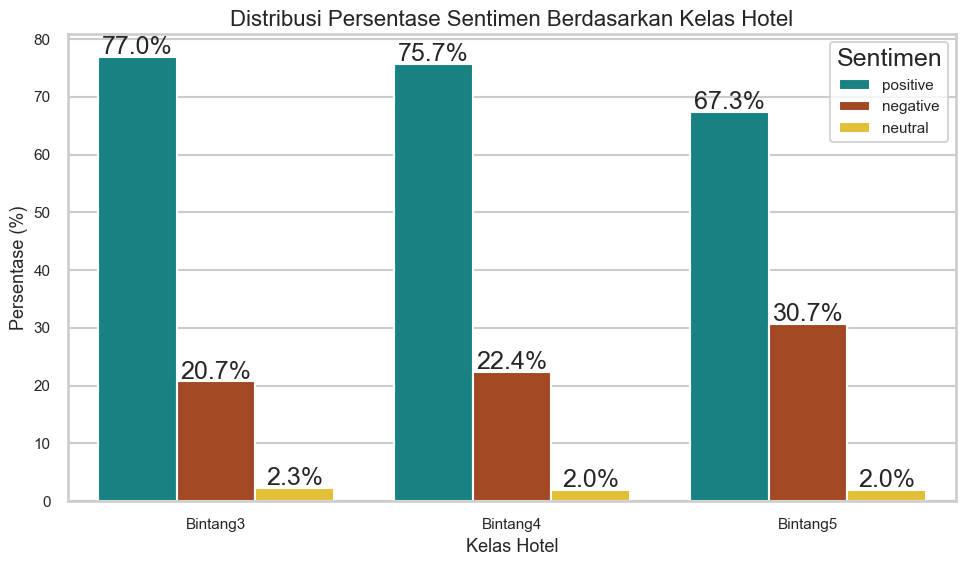

In [26]:
# VISUALISASI 2

plt.figure()

ax = sns.barplot(
    data=df_sentiment_pct,
    x="Kelas",
    y="Persentase",
    hue="AI_Sentiment",
    order=["Bintang3", "Bintang4", "Bintang5"],
    hue_order=SENTIMENT_ORDER,
    palette=SENTIMENT_PALETTE,
    errorbar=None   # ⬅️ INI KUNCINYA
)

ax.set_title("Distribusi Persentase Sentimen Berdasarkan Kelas Hotel")
ax.set_xlabel("Kelas Hotel")
ax.set_ylabel("Persentase (%)")
ax.legend(title="Sentimen")

add_percentage_labels(ax)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "2_sentimen_per_kelas_bintang.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()


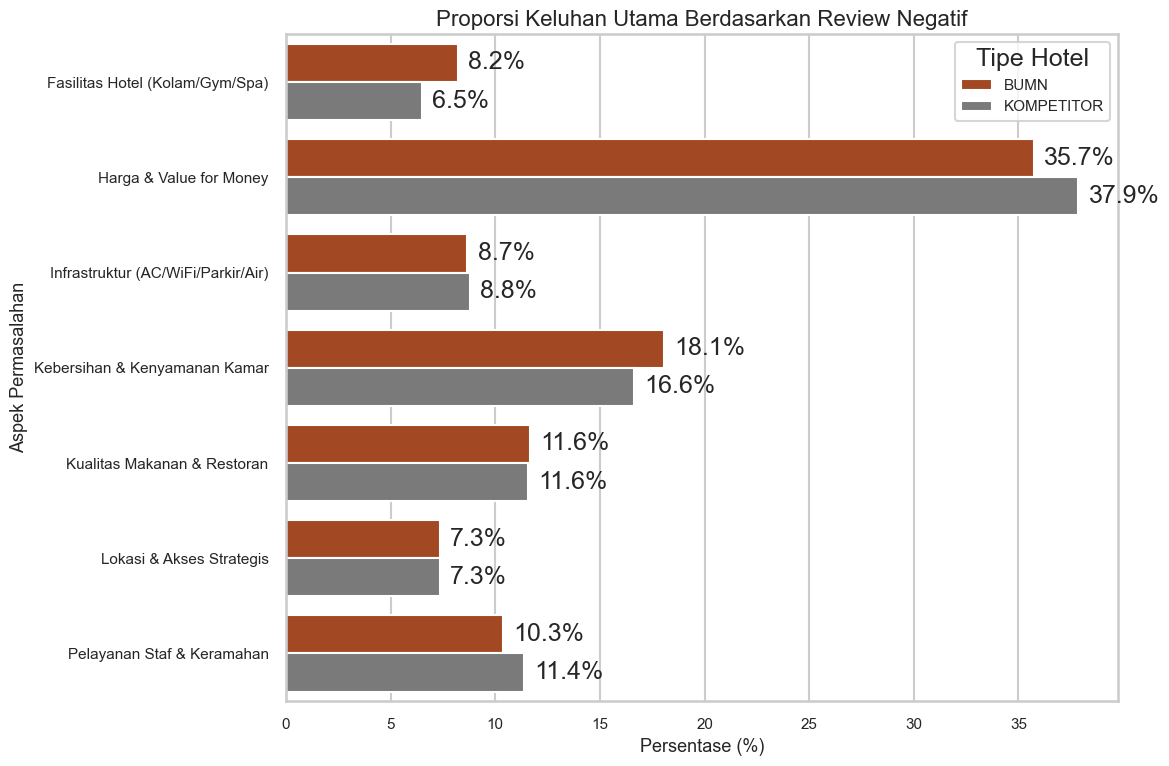

In [22]:
# VISUALISASI 3

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=df_neg_pct,
    y="AI_Aspek",
    x="Persentase",
    hue="Tipe",
    palette=["#B7410E", "#7A7A7A"]
)

ax.set_title("Proporsi Keluhan Utama Berdasarkan Review Negatif")
ax.set_xlabel("Persentase (%)")
ax.set_ylabel("Aspek Permasalahan")
ax.legend(title="Tipe Hotel")

add_percentage_labels(ax, horizontal=True)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "3_peta_masalah_negatif.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()
